# Training with Decision Tree Model

In [1]:
from sklearn import datasets as skd
from sklearn import tree
import numpy as np

In [2]:
iris = skd.load_iris()
test_idx = [0, 50, 100]

# Training data
train_data = np.delete(iris.data, test_idx, axis=0)
train_target = np.delete(iris.target, test_idx)

# Testing data
test_data = iris.data[test_idx]
test_target = iris.target[test_idx]

In [3]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

print "Target:     %s" % test_target
print "Prediction: %s" % clf.predict(test_data)

Target:     [0 1 2]
Prediction: [0 1 2]


## Visualize Decision Tree

In [4]:
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf,
                     out_file=dot_data,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())



Here a trick with `matplotlib` and `pydot` is used to generate and show the graph in the notebook:

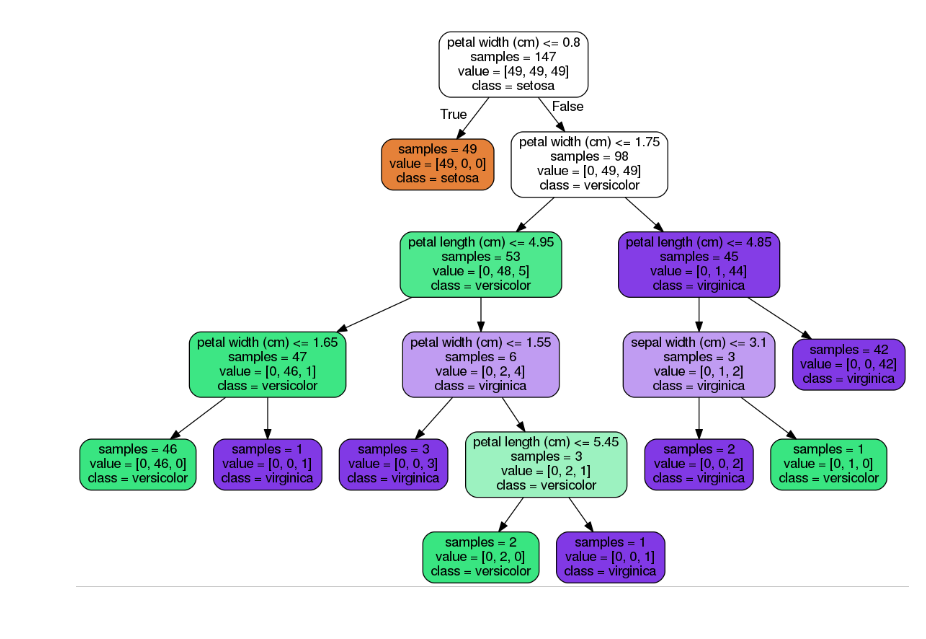

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# render pydot by calling dot, no file saved to disk
png_str = graph[0].create_png(prog='dot')

# treat the dot output string as an image file
sio = StringIO()
sio.write(png_str)
sio.seek(0)
img = mpimg.imread(sio)

# plot the image

plt.figure(num=None, dpi=180, facecolor='w', edgecolor='k')
plt.axis("off")
imgplot = plt.imshow(img, aspect='equal')
plt.show(block=False)

# Recipe #5

In [8]:
from sklearn import datasets as skd

iris = skd.load_iris()

X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# Classifier 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
# ---------

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)

print "Accuracy score: %f.3" % score

Accuracy score: 0.946667.3


# Recipe #6 - TensorFlow for Poets

## References
* https://codelabs.developers.google.com/codelabs/tensorflow-for-poets/index.html?index=..%2F..%2Findex
* https://github.com/tensorflow/models/blob/master/research/inception/README.md
* https://www.tensorflow.org/tutorials/layers?utm_campaign=chrome_series_machinelearning_063016&utm_source=gdev&utm_medium=yt-desc
* https://www.tensorflow.org/tutorials/image_recognition